In [1]:
% matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import invgamma

Thompson sampling for MAB problem - Exponential continuous variables
---

In [3]:
class exponentialThompson():
    """
    class to capture states during a thompson MAB sample algorithm
    with exponential distributed reward - good for revenue wher conversion rates are low
    pick_bandit - picks a bandit given what is known about the dist
    update - update a bandit given a success/failure
    """
    def __init__(self,bandits=3,prior_scale=100):
        
        self.bandits = bandits
        
        ## initialise bandit distribution parameters
        self.dists = [[prior_scale,prior_scale] for x in range(bandits)] # shape and scale starting points
        
        ## capture rv's and outputs at each iteration
        self.rv = []
        self.op = []
        
    def pick_bandit(self):
        
        # generate and log rvs for each distribution, and get best_rv
        # uses scipy.stats.invgamma.rvs(a (shape), scale)
        rv_i = [
            invgamma.rvs(a=self.dists[x][0],scale=self.dists[x][1]) 
            for x in range(self.bandits)
        ]
        self.rv.append(rv_i)
        return np.argmax(rv_i)
    
    def update(self,bandit_id,value):
        self.dists[bandit_id][0] += 1
        self.dists[bandit_id][1] += value

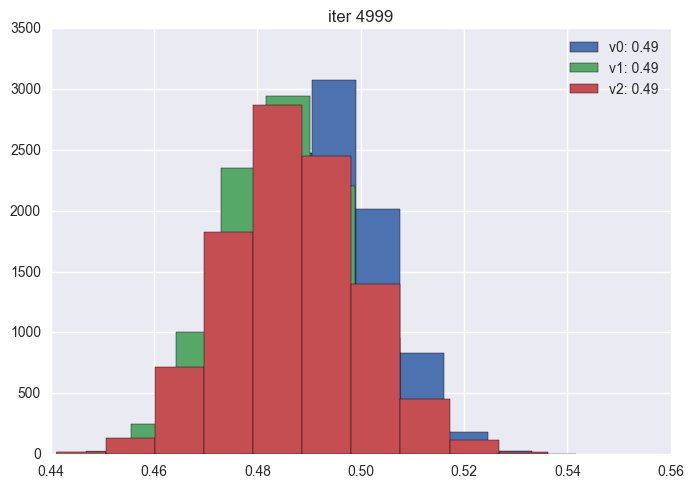

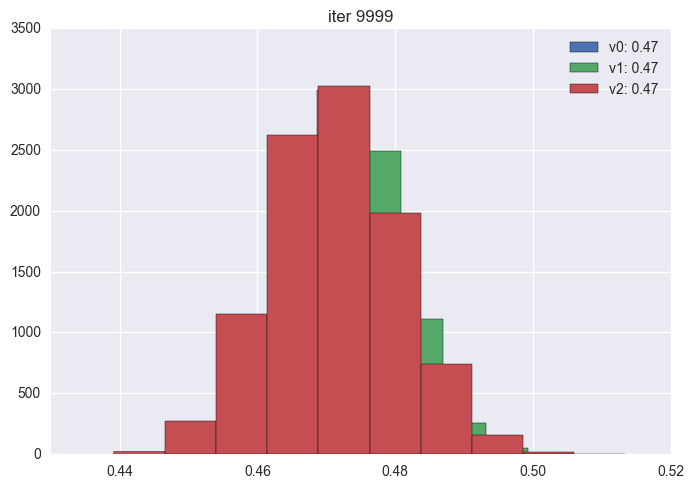

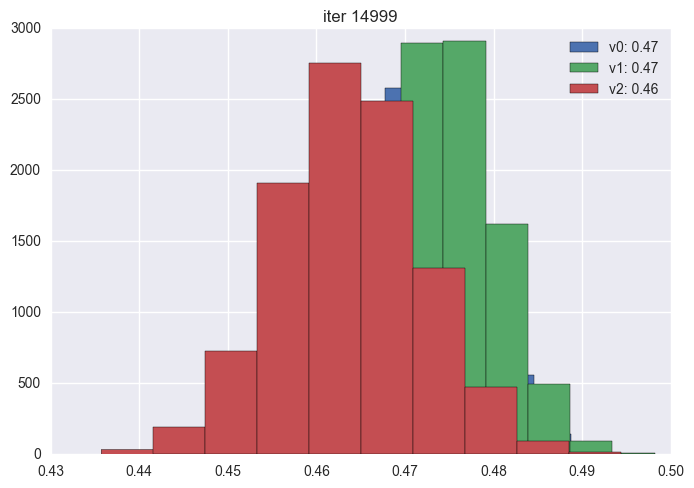

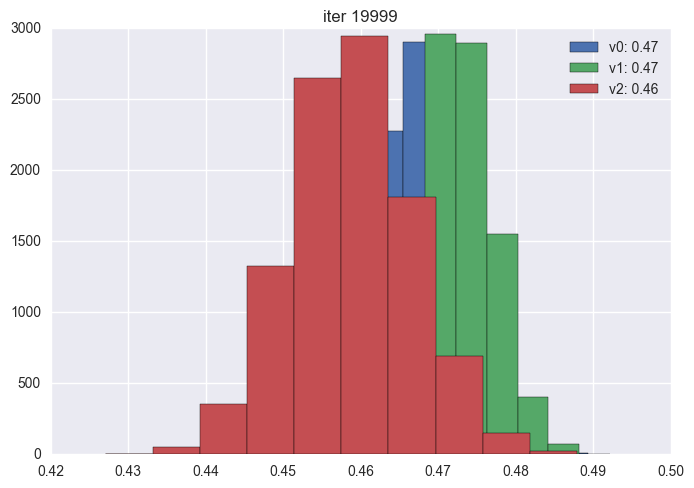

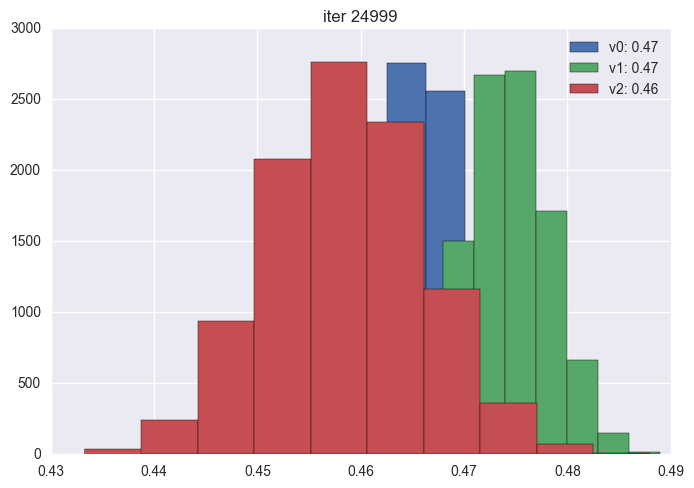

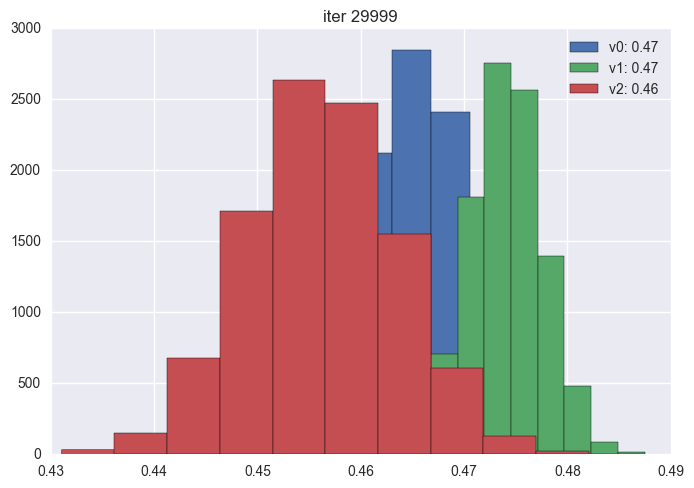

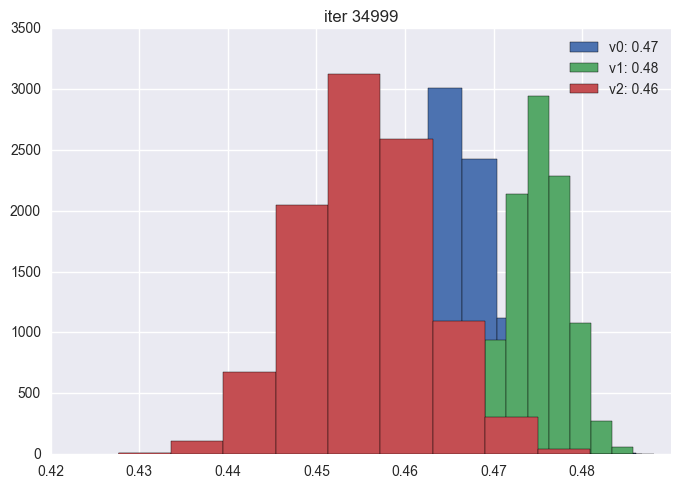

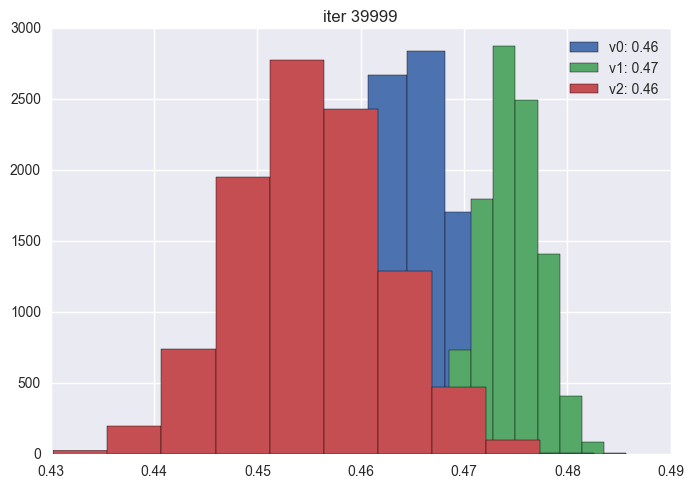

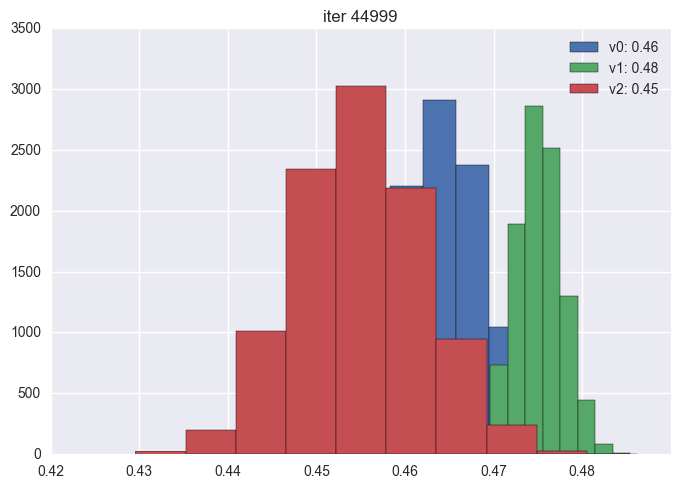

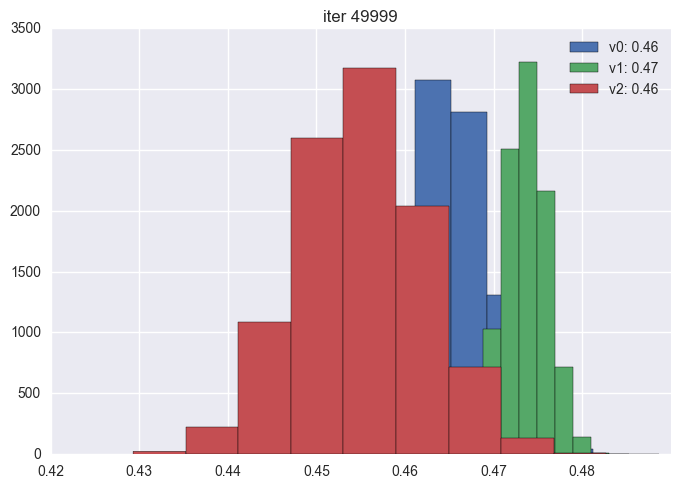

In [4]:
true_m = [0.45, 0.47, 0.45]

## initialize sampler
t = exponentialThompson(3)


for i in range(50000):
    #print i
    #print t.dists
    
    ## pick bandit to assign
    b_i = t.pick_bandit()
    
    ## calculate success
    spend = np.random.exponential(scale = true_m[b_i])
    #print spend
    
    ## update bandit
    t.update(b_i,spend)
    
    
    ## Plot distributions
    if i%5000==4999:
        for j in range(3):
            r = invgamma.rvs(a=t.dists[j][0],scale=t.dists[j][1],size=10000) 
            plt.hist(
                r,
                label='v'+str(j)+': '+str(round(np.mean(r),2))
            )
        plt.legend(loc='best')
        plt.title('iter '+str(i))
        plt.show()

In [5]:
#How many times did it pick 1 in the first 2000 vs. last 2000?
print np.mean(map(lambda x: np.argmax(x)==1,t.rv)[:1000])
print np.mean(map(lambda x: np.argmax(x)==1,t.rv)[9000:])

0.369
0.827292682927


/Users/apatterson/Envs/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  app.launch_new_instance()


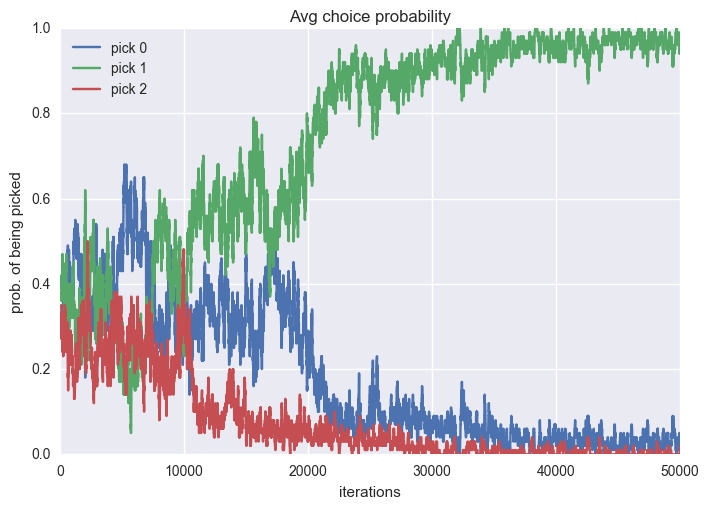

In [6]:
def plot_choice_probabilities(thompson_object):
    for i in range(thompson_object.bandits):
        pick = pd.rolling_mean(pd.Series(map(lambda x: np.argmax(x)==i,t.rv)),100)
        plt.plot(pick,label='pick '+str(i))
    plt.title('Avg choice probability')
    plt.legend(loc='best')
    plt.xlabel('iterations')
    plt.ylabel('prob. of being picked')
    return plt

plot_choice_probabilities(t)
plt.show()

## What do the choice probabilities look like with different priors?

/Users/apatterson/Envs/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  app.launch_new_instance()


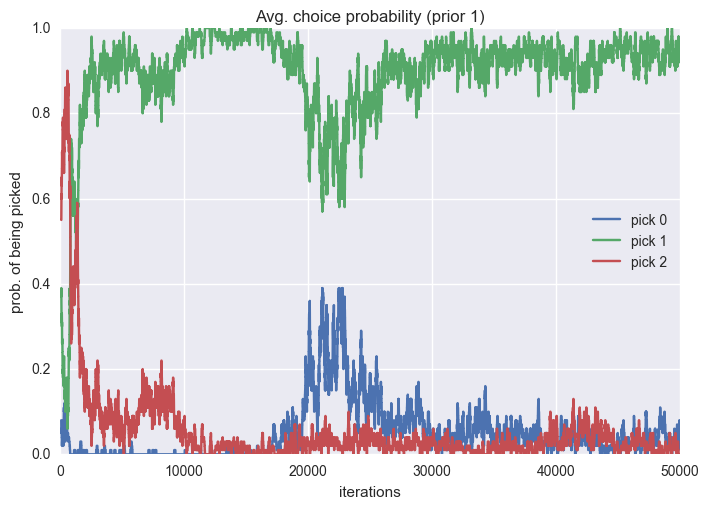

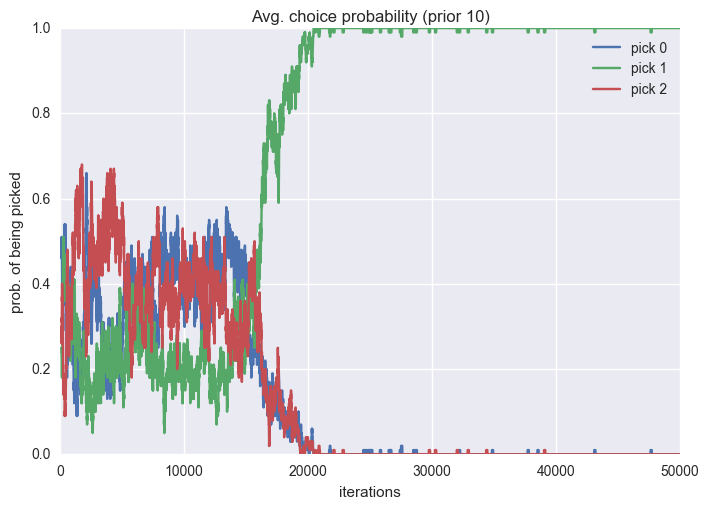

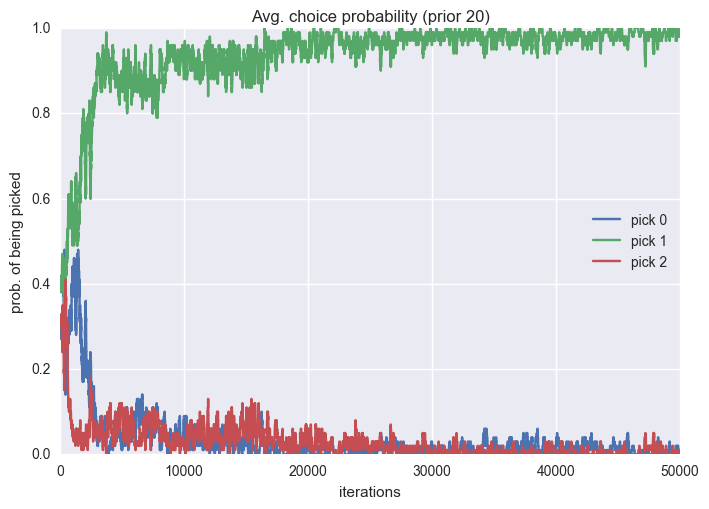

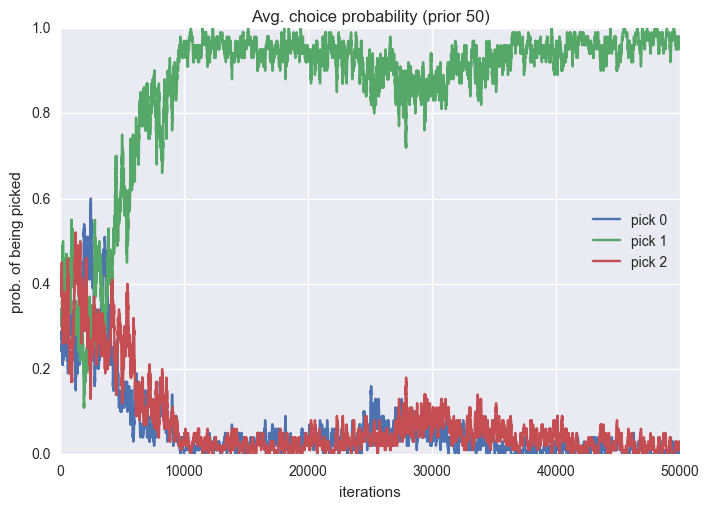

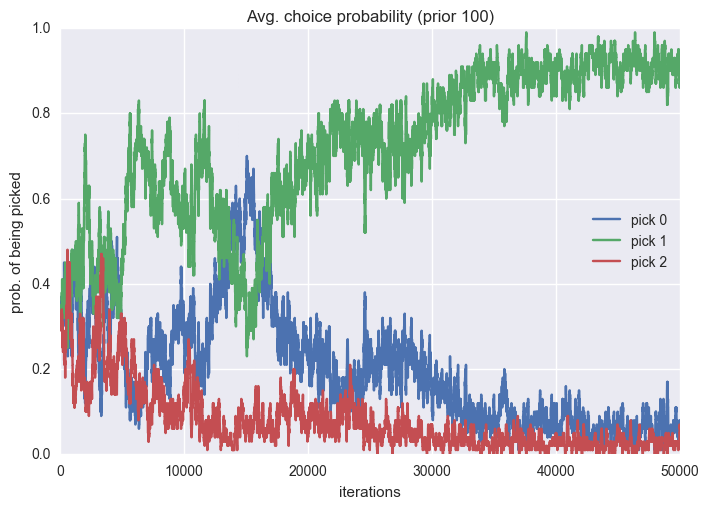

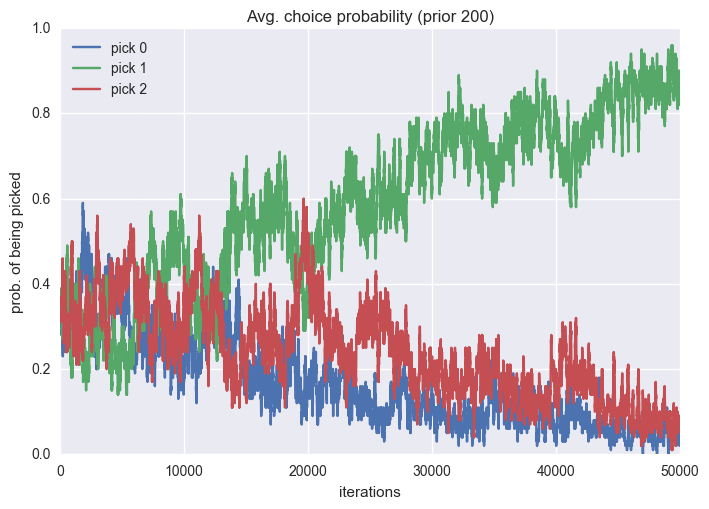

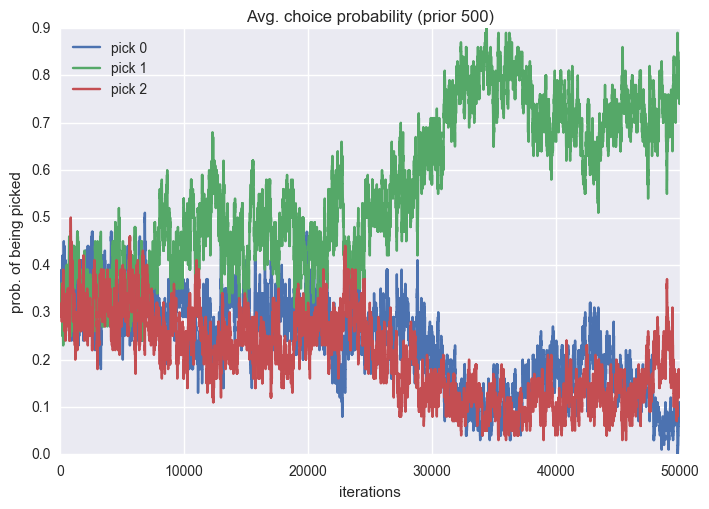

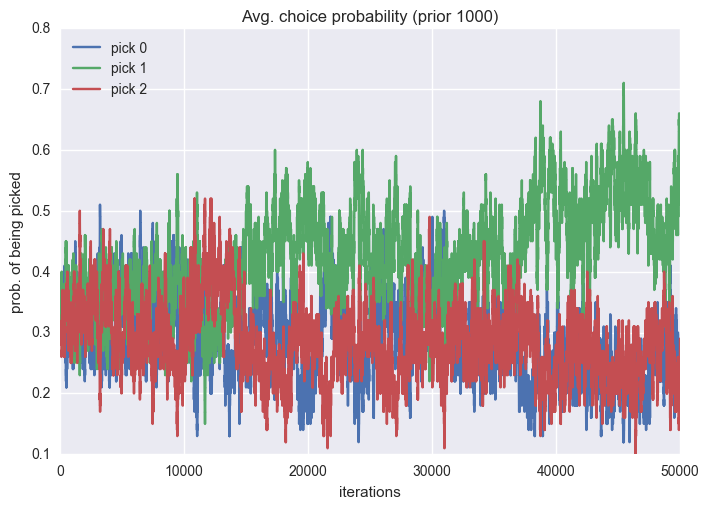

In [7]:
true_m = [0.45, 0.47, 0.45]

for ps in [1,10,20,50,100,200,500,1000]:
    ## initialize sampler
    t = exponentialThompson(3,prior_scale=ps)

    for i in range(50000):
        #print i
        #print t.dists

        ## pick bandit to assign
        b_i = t.pick_bandit()

        ## calculate success
        spend = np.random.exponential(scale = true_m[b_i])
        #print spend

        ## update bandit
        t.update(b_i,spend)
    
    plot_choice_probabilities(t)
    plt.title('Avg. choice probability (prior {ps})'.format(ps=ps))
    plt.show()